<a href="https://colab.research.google.com/github/vicenzo28/archive/blob/main/TugasBasisDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/private-key1.json"

In [ ]:
bqclient = bigquery.Client()

query_string = """
SELECT 
  series_description.*,
  data_wdi.country_code,
  data_wdi.country_name,
  data_wdi.value,
  data_wdi.year
FROM 
  `bitlabs-dab.worldbank_wdi.series_description` AS series_description
FULL OUTER JOIN
  `bitlabs-dab.worldbank_wdi.data` AS data_wdi
ON
  series_description.series_code = data_wdi.indicator_code
WHERE
  series_description.series_code LIKE "%HIV%"
  AND data_wdi.country_name LIKE "%Indonesia%"
ORDER BY 
  data_wdi.year ASC



"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
    )
)

In [ ]:
df.shape

(352, 10)

In [ ]:
df

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,country_code,country_name,value,year
0,SH.HIV.INCD.TL,Health: Risk factors,Adults (ages 15+) and children (ages 0-14) new...,NULL,Number of adults (ages 15+) and children (ages...,Annual,IDN,Indonesia,100.00,1990
1,SH.HIV.INCD.YG.P3,Health: Risk factors,"Incidence of HIV, ages 15-24 (per 1,000 uninfe...",NULL,Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990
2,SH.HIV.1524.FE.ZS,Health: Risk factors,"Prevalence of HIV, female (% ages 15-24)",NULL,"Prevalence of HIV, female is the percentage of...",Annual,IDN,Indonesia,0.10,1990
3,SH.HIV.INCD.TL.P3,Health: Risk factors,"Incidence of HIV, all (per 1,000 uninfected po...",NULL,Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990
4,SH.HIV.1524.MA.ZS,Health: Risk factors,"Prevalence of HIV, male (% ages 15-24)",NULL,"Prevalence of HIV, male is the percentage of m...",Annual,IDN,Indonesia,0.10,1990
...,...,...,...,...,...,...,...,...,...,...
347,SH.HIV.INCD,Health: Risk factors,Adults (ages 15-49) newly infected with HIV,NULL,Number of adults (ages 15-49) newly infected w...,Annual,IDN,Indonesia,24000.00,2020
348,SH.HIV.INCD.ZS,Health: Risk factors,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",NULL,Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.17,2020
349,SH.HIV.0014,Health: Risk factors,Children (0-14) living with HIV,NULL,Children living with HIV refers to the number ...,Annual,IDN,Indonesia,18000.00,2020
350,SH.HIV.INCD.14,Health: Risk factors,Children (ages 0-14) newly infected with HIV,NULL,Number of children (ages 0-14) newly infected ...,Annual,IDN,Indonesia,3200.00,2020


In [ ]:
df[df['short_definition'].isnull()]

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,country_code,country_name,value,year


In [ ]:
df[df['series_code'].isnull()]

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,country_code,country_name,value,year


In [ ]:
df[df['topic'].isnull()]

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,country_code,country_name,value,year


In [ ]:
df[df['indicator_name'].isnull()]

,series_code,topic,indicator_name,short_definition,long_definition,periodicity,country_code,country_name,value,year


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   series_code       352 non-null    object 
 1   topic             352 non-null    object 
 2   indicator_name    352 non-null    object 
 3   short_definition  352 non-null    object 
 4   long_definition   352 non-null    object 
 5   periodicity       352 non-null    object 
 6   country_code      352 non-null    object 
 7   country_name      352 non-null    object 
 8   value             352 non-null    float64
 9   year              352 non-null    Int64  
dtypes: Int64(1), float64(1), object(8)
memory usage: 28.0+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def viz_boxhistplot(data, target_column, feature_column):    
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    boxplot = sns.boxplot(data = data, x = feature_column, ax = ax_box, y = target_column)
    histplot = sns.histplot(data = data, x = feature_column, ax = ax_hist, hue = target_column)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram')
    ax_hist.set_xlabel(feature_column)
    plt.suptitle(f'{feature_column} and {target_column}: Boxplot and Histogram')
    plt.show()

In [ ]:
def viz_barplot(data, target_column, feature_column, x_axis_rotation = 0):
    fig = plt.figure(figsize = (7,5))
    ax = sns.countplot(data = data, x= feature_column, hue = target_column)
       
    ax.set_ylabel('Quantity')
    ax.set_xlabel(feature_column)
    plt.xticks(rotation = x_axis_rotation)
    plt.title(f'{feature_column} and {target_column}: Count & Proportion')
    plt.show()

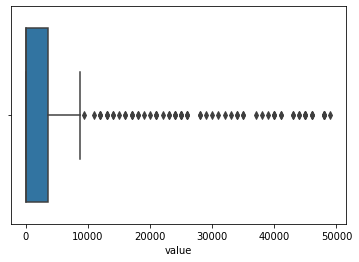

In [ ]:
sns.boxplot(data = df, x = 'value')
plt.show()

In [ ]:
outlier_value = df[(df['value'] < lower_limit) | (df['value'] > upper_limit)]
outlier_value

df.shape

(352, 10)

In [ ]:
q1 = df['value'].quantile(0.25)
q3 = df['value'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

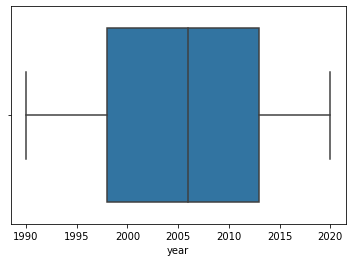

In [ ]:
sns.boxplot(data = df, x = 'year')
plt.show()

In [ ]:
del(df['short_definition'])
df

,series_code,topic,indicator_name,long_definition,periodicity,country_code,country_name,value,year
0,SH.HIV.INCD.TL,Health: Risk factors,Adults (ages 15+) and children (ages 0-14) new...,Number of adults (ages 15+) and children (ages...,Annual,IDN,Indonesia,100.00,1990
1,SH.HIV.INCD.YG.P3,Health: Risk factors,"Incidence of HIV, ages 15-24 (per 1,000 uninfe...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990
2,SH.HIV.1524.FE.ZS,Health: Risk factors,"Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, female is the percentage of...",Annual,IDN,Indonesia,0.10,1990
3,SH.HIV.INCD.TL.P3,Health: Risk factors,"Incidence of HIV, all (per 1,000 uninfected po...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990
4,SH.HIV.1524.MA.ZS,Health: Risk factors,"Prevalence of HIV, male (% ages 15-24)","Prevalence of HIV, male is the percentage of m...",Annual,IDN,Indonesia,0.10,1990
...,...,...,...,...,...,...,...,...,...
347,SH.HIV.INCD,Health: Risk factors,Adults (ages 15-49) newly infected with HIV,Number of adults (ages 15-49) newly infected w...,Annual,IDN,Indonesia,24000.00,2020
348,SH.HIV.INCD.ZS,Health: Risk factors,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.17,2020
349,SH.HIV.0014,Health: Risk factors,Children (0-14) living with HIV,Children living with HIV refers to the number ...,Annual,IDN,Indonesia,18000.00,2020
350,SH.HIV.INCD.14,Health: Risk factors,Children (ages 0-14) newly infected with HIV,Number of children (ages 0-14) newly infected ...,Annual,IDN,Indonesia,3200.00,2020


In [ ]:
df['age_and_gender'] = df["indicator_name"].apply(lambda x: x.split("Incidence of HIV")[0].split("(")[0]).str.title()
df

,series_code,topic,indicator_name,long_definition,periodicity,country_code,country_name,value,year,age_and_gender
0,SH.HIV.INCD.TL,Health: Risk factors,Adults (ages 15+) and children (ages 0-14) new...,Number of adults (ages 15+) and children (ages...,Annual,IDN,Indonesia,100.00,1990,Adults
1,SH.HIV.INCD.YG.P3,Health: Risk factors,"Incidence of HIV, ages 15-24 (per 1,000 uninfe...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990,
2,SH.HIV.1524.FE.ZS,Health: Risk factors,"Prevalence of HIV, female (% ages 15-24)","Prevalence of HIV, female is the percentage of...",Annual,IDN,Indonesia,0.10,1990,"Prevalence Of Hiv, Female"
3,SH.HIV.INCD.TL.P3,Health: Risk factors,"Incidence of HIV, all (per 1,000 uninfected po...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.01,1990,
4,SH.HIV.1524.MA.ZS,Health: Risk factors,"Prevalence of HIV, male (% ages 15-24)","Prevalence of HIV, male is the percentage of m...",Annual,IDN,Indonesia,0.10,1990,"Prevalence Of Hiv, Male"
...,...,...,...,...,...,...,...,...,...,...
347,SH.HIV.INCD,Health: Risk factors,Adults (ages 15-49) newly infected with HIV,Number of adults (ages 15-49) newly infected w...,Annual,IDN,Indonesia,24000.00,2020,Adults
348,SH.HIV.INCD.ZS,Health: Risk factors,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",Number of new HIV infections among uninfected ...,Annual,IDN,Indonesia,0.17,2020,
349,SH.HIV.0014,Health: Risk factors,Children (0-14) living with HIV,Children living with HIV refers to the number ...,Annual,IDN,Indonesia,18000.00,2020,Children
350,SH.HIV.INCD.14,Health: Risk factors,Children (ages 0-14) newly infected with HIV,Number of children (ages 0-14) newly infected ...,Annual,IDN,Indonesia,3200.00,2020,Children


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   series_code      352 non-null    object 
 1   topic            352 non-null    object 
 2   indicator_name   352 non-null    object 
 3   long_definition  352 non-null    object 
 4   periodicity      352 non-null    object 
 5   country_code     352 non-null    object 
 6   country_name     352 non-null    object 
 7   value            352 non-null    float64
 8   year             352 non-null    Int64  
 9   age_and_gender   352 non-null    object 
dtypes: Int64(1), float64(1), object(8)
memory usage: 28.0+ KB


In [ ]:
pivot2= df.pivot_table(index='year', values='value', columns='age_and_gender')
pivot2

age_and_gender,,Adults,Antiretroviral Therapy Coverage,Antiretroviral Therapy Coverage For Pmtct,Children,"Prevalence Of Hiv, Female","Prevalence Of Hiv, Male",Young People
year,,,,,,,,
1990,0.010000,100.0,NaN,NaN,100.0,0.1,0.1,100.0
1991,0.010000,200.0,NaN,NaN,100.0,0.1,0.1,200.0
1992,0.010000,500.0,NaN,NaN,100.0,0.1,0.1,200.0
1993,0.010000,825.0,NaN,NaN,100.0,0.1,0.1,500.0
1994,0.013333,1100.0,NaN,NaN,100.0,0.1,0.1,1000.0
1995,0.020000,1900.0,NaN,NaN,100.0,0.1,0.1,1100.0
1996,0.030000,3150.0,NaN,NaN,100.0,0.1,0.1,1800.0
1997,0.040000,4650.0,NaN,NaN,150.0,0.1,0.1,2600.0
1998,0.060000,6500.0,NaN,NaN,200.0,0.1,0.1,3600.0


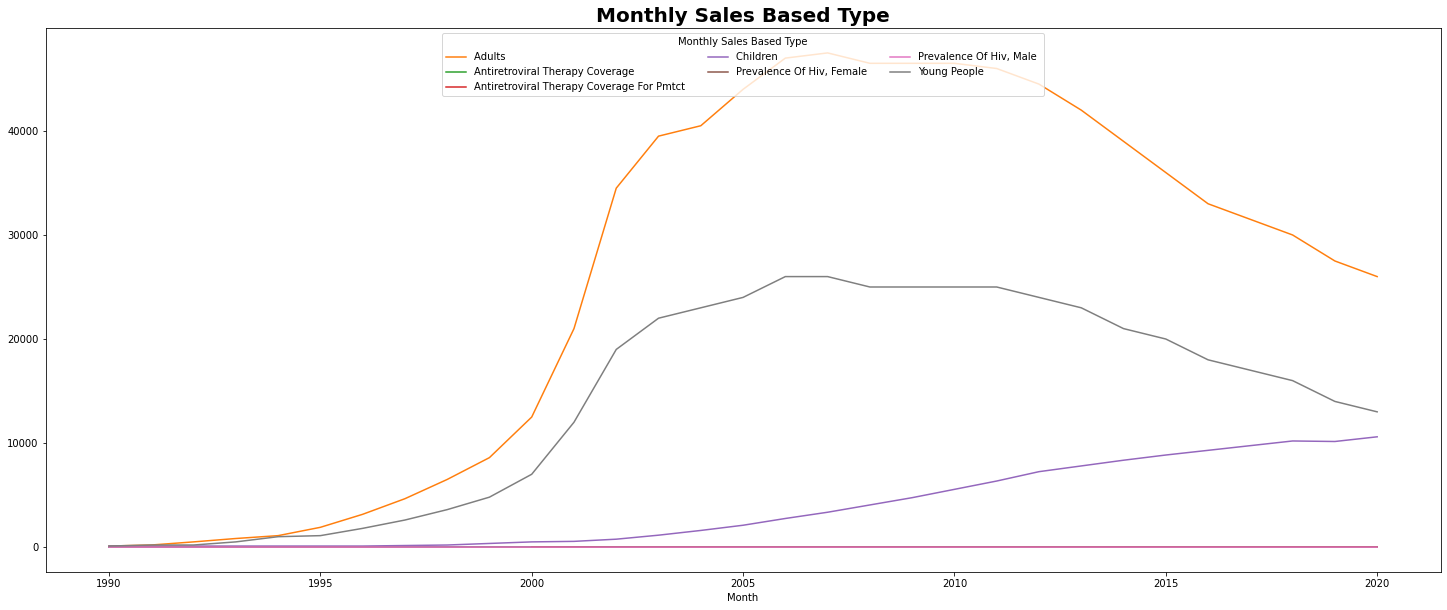

In [ ]:
import matplotlib.pyplot as plt

pivot2.plot(kind='line', figsize=(25,10))
plt.title('Monthly Sales Based Type', fontsize=20, fontweight='bold')
plt.xlabel('Month')
plt.legend(title='Monthly Sales Based Type', ncol=3, loc='upper center')

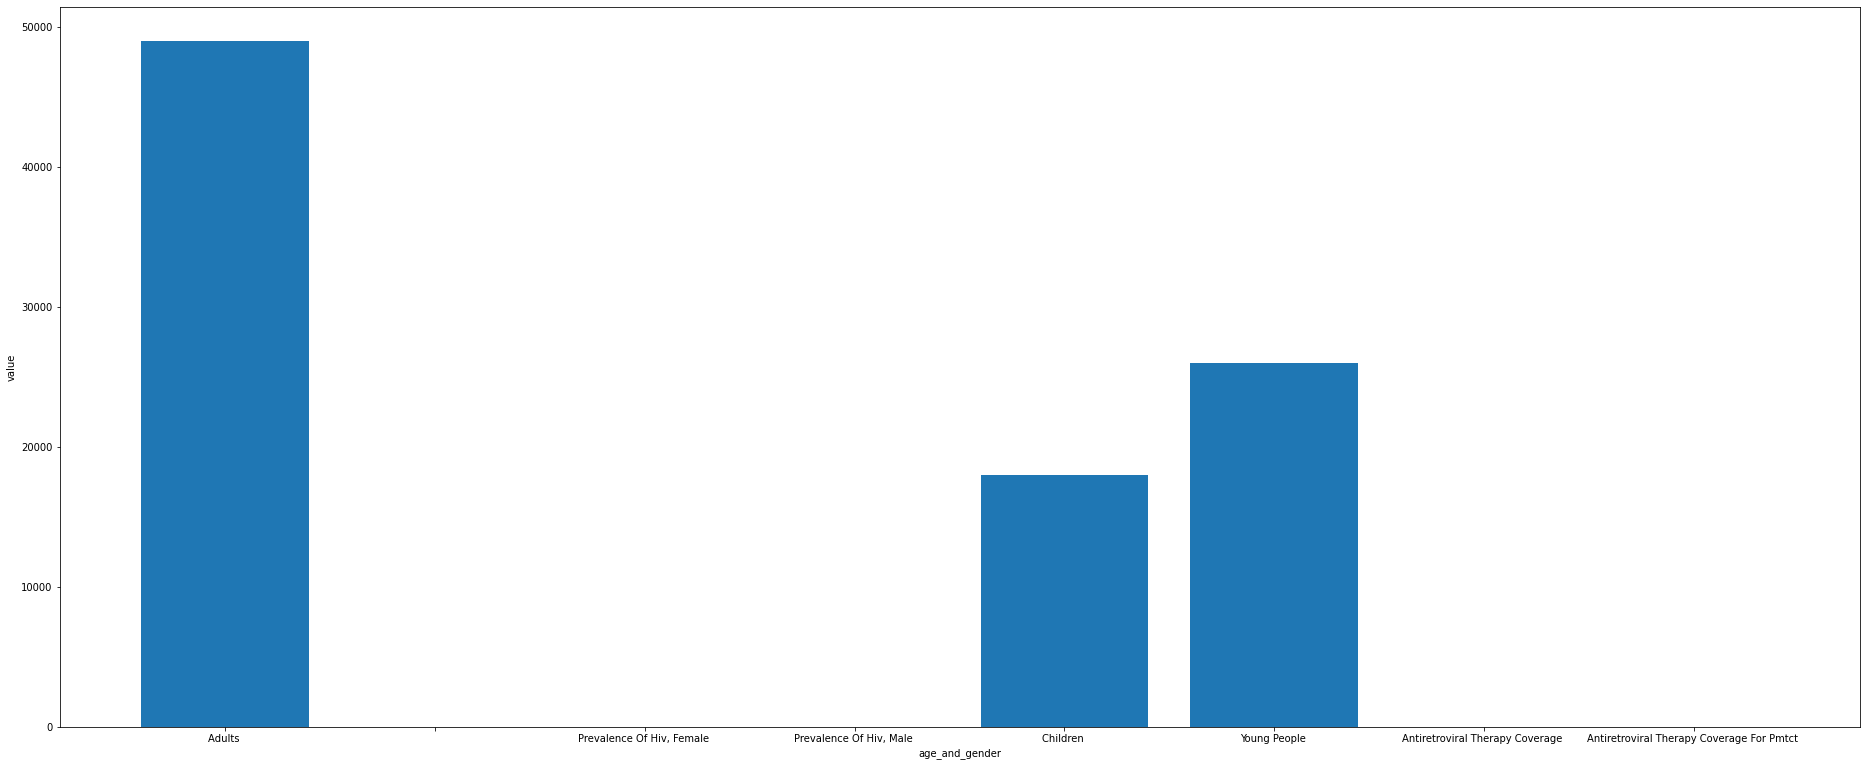

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('age_and_gender')
ax.set_ylabel('value')

ax.bar(df['age_and_gender'], df['value'])
plt.show()

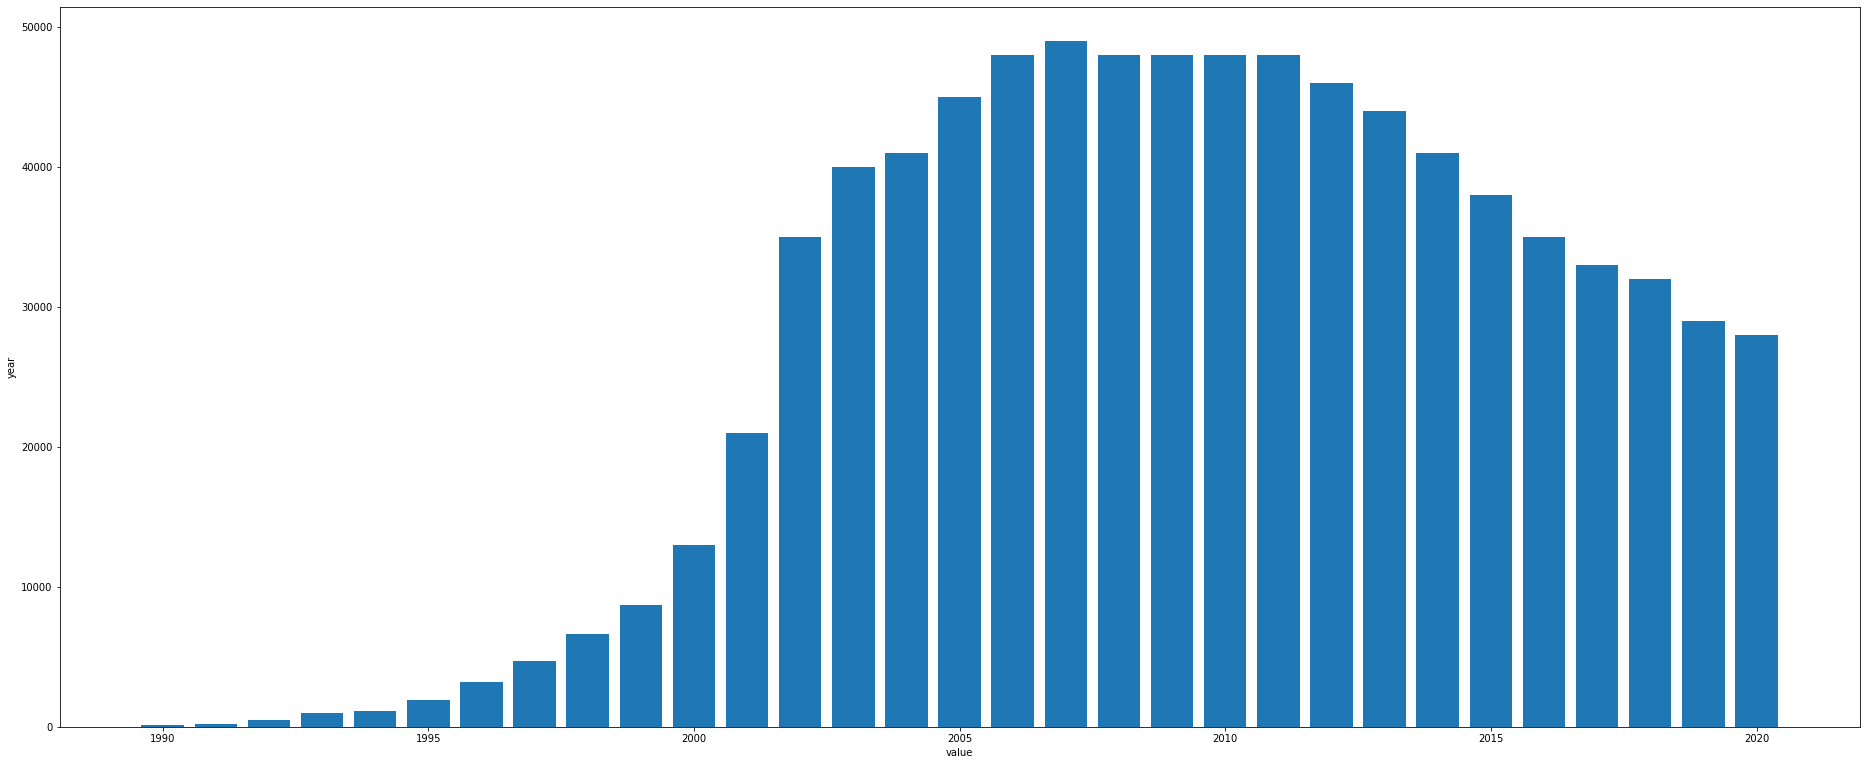

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('value')
ax.set_ylabel('year')

ax.bar(df['year'], df['value'])
plt.show()

([<matplotlib.patches.Wedge at 0x7f7ae20878e0>,
 [Text(1.0999999996023353, 2.957807289903856e-05, ''),
  Text(-0.6618991756231531, 0.8785724109653059, 'Adults '),
  Text(-0.3032576498575535, -1.057371646018028, 'Antiretroviral Therapy Coverage '),
  Text(-0.3028520792662469, -1.0574878808213883, 'Antiretroviral Therapy Coverage For Pmtct '),
  Text(0.04625201264958905, -1.099027184070468, 'Children '),
  Text(0.3904711094195631, -1.0283639009167211, 'Prevalence Of Hiv, Female '),
  Text(0.39048491417394926, -1.0283586591275262, 'Prevalence Of Hiv, Male '),
  Text(0.9054120588178162, -0.6246831226688325, 'Young People ')],
 [Text(0.5999999997830919, 1.6133494308566484e-05, '0.00%'),
  Text(-0.3610359139762653, 0.479221315071985, '70.55%'),
  Text(-0.1654132635586655, -0.5767481705552879, '0.01%'),
  Text(-0.16519204323613468, -0.5768115713571209, '0.01%'),
  Text(0.02522837053613948, -0.5994693731293461, '10.21%'),
  Text(0.21298424150157985, -0.5609257641363933, '0.00%'),
  Text(0.2129

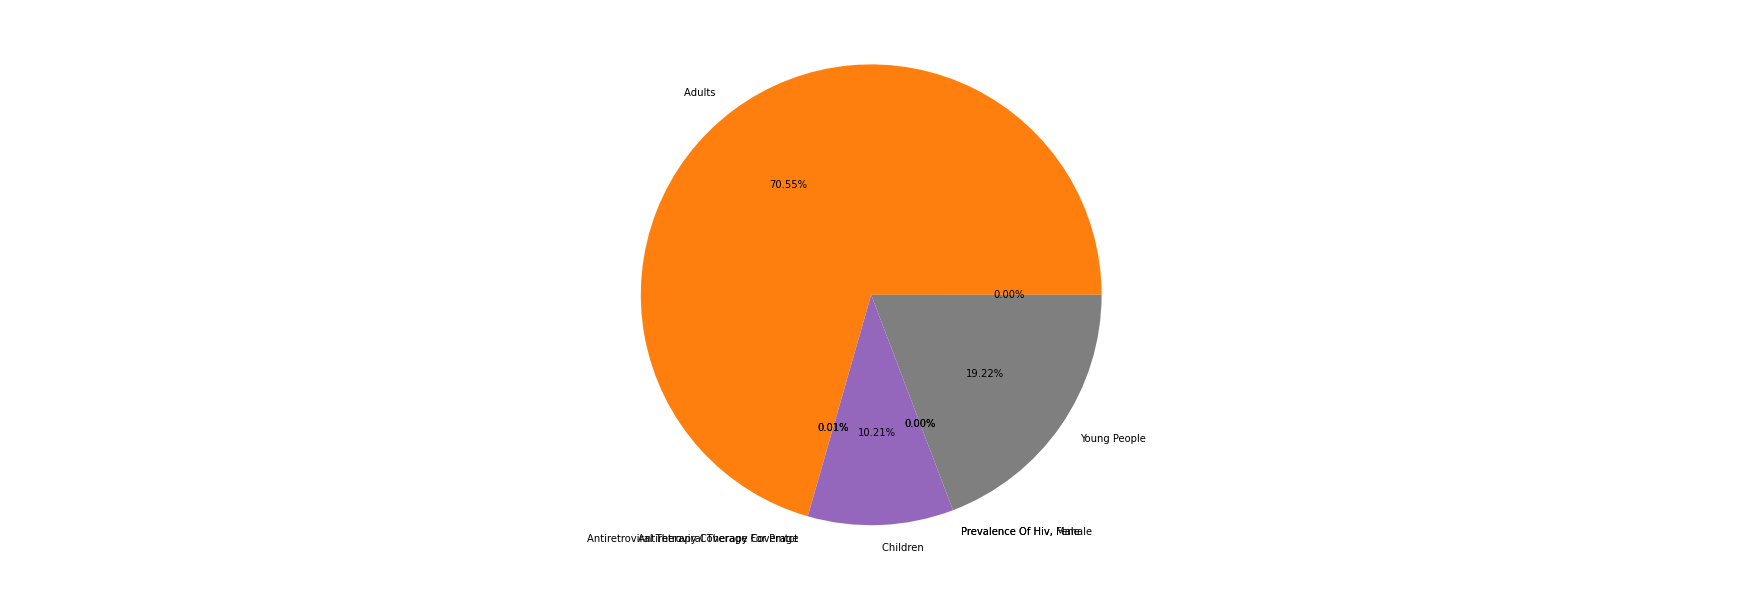

In [ ]:
df_age_and_gender = df.groupby('age_and_gender').sum()['value'].reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,4,2])
ax.axis('equal')
ax.pie(df_age_and_gender['value'],labels=df_age_and_gender['age_and_gender'],autopct='%1.2f%%')